## (unfinished)Custom NIRCAM Pipeline

The data used in this example are 5 dithered detector B3 images of a calibration field near the ecliptic.  The uncal.fits files are placed together in a directory.  cd into this directory, activate your JWST environment, then launch Jupyter Lab.

We start with our inital imports.

In [1]:
import os
os.environ['CRDS_PATH'] = '$HOME/crds_cache'
os.environ['CRDS_SERVER_URL'] = 'https://jwst-crds.stsci.edu'
import glob
import crds
import jwst
from tqdm import tqdm
from jwst.pipeline import Detector1Pipeline, Image2Pipeline, Image3Pipeline

In [2]:
print('Files used:')
uncal_files = sorted(glob.glob('*nrcb3*_uncal.fits'))
for file in uncal_files:
    print(file)

Files used:
jw04443002001_02101_00004_nrcb3_uncal.fits
jw04443002001_02101_00008_nrcb3_uncal.fits
jw04443002001_02101_00009_nrcb3_uncal.fits
jw04443002001_02101_00012_nrcb3_uncal.fits
jw04443002001_02101_00016_nrcb3_uncal.fits


For the purposes of comparison and to identify areas of improvement, we begin by running the default pipeline.  To help identify/debug issues, we save the results of the jump step and tweakreg catalogs.

In [3]:
for file in tqdm(uncal_files):
    result = Detector1Pipeline.call(file, save_results=True, steps={'jump': {'save_results': True}}, 
                                    output_file='{}default'.format(os.path.basename(file).split('uncal')[0]))

  0%|                                                                                                                    | 0/5 [00:00<?, ?it/s]2024-07-09 12:01:02,087 - stpipe - INFO - PARS-JUMPSTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-jumpstep_0003.asdf
2024-07-09 12:01:02,141 - stpipe - INFO - PARS-DETECTOR1PIPELINE parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-detector1pipeline_0002.asdf
2024-07-09 12:01:02,213 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2024-07-09 12:01:02,215 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2024-07-09 12:01:02,221 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2024-07-09 12:01:02,241 - stpipe.Detector1Pipeline.emicorr - INFO - EmiCorrStep instance created.
2024-07-09 12:01:02,244 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2024-07-09 12:01:02,275 - stpipe.Detect

In [4]:
rate_files = sorted(glob.glob('*nrcb3_default_rate.fits'))
for file in tqdm(rate_files):
    result = Image2Pipeline.call(file, save_results=True)

  0%|                                                                                                                    | 0/5 [00:00<?, ?it/s]2024-07-09 12:16:30,172 - stpipe - INFO - PARS-RESAMPLESTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-resamplestep_0001.asdf
2024-07-09 12:16:30,235 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2024-07-09 12:16:30,238 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2024-07-09 12:16:30,248 - stpipe.Image2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2024-07-09 12:16:30,253 - stpipe.Image2Pipeline.flat_field - INFO - FlatFieldStep instance created.
2024-07-09 12:16:30,261 - stpipe.Image2Pipeline.photom - INFO - PhotomStep instance created.
2024-07-09 12:16:30,272 - stpipe.Image2Pipeline.resample - INFO - ResampleStep instance created.
2024-07-09 12:16:30,757 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline running with args ('jw04443002001_02101

In [5]:
from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base
cal_files = sorted(glob.glob('*nrcb3_default_cal.fits'))
asn = asn_from_list.asn_from_list(cal_files, rule=DMS_Level3_Base, product_name='nircam_f070w_default')
with open('nircam_f070w_default.json', 'w') as outfile:
    outfile.write(asn.dump()[1])

In [6]:
result = Image3Pipeline.call('nircam_f070w_default.json', save_results=True, steps={'tweakreg': {'save_catalogs': True}})

2024-07-09 12:20:20,655 - stpipe - INFO - PARS-TWEAKREGSTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-tweakregstep_0030.asdf
2024-07-09 12:20:20,694 - stpipe - INFO - PARS-RESAMPLESTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-resamplestep_0001.asdf
2024-07-09 12:20:20,744 - stpipe - INFO - PARS-SOURCECATALOGSTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-sourcecatalogstep_0016.asdf
2024-07-09 12:20:20,818 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2024-07-09 12:20:20,822 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2024-07-09 12:20:20,829 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep instance created.
2024-07-09 12:20:20,832 - stpipe.Image3Pipeline.skymatch - INFO - SkyMatchStep instance created.
2024-07-09 12:20:20,836 - stpipe.Image3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.
2024-07-09 12:

2024-07-09 12:28:04,713 - stpipe - WARNING - /usr/local/anaconda3/envs/jwst_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
2024-07-09 12:28:04,714 - stpipe - WARNING -   warnings.warn(
2024-07-09 12:28:04,718 - stpipe - WARNING - 


Text(0.5, 1.0, 'Default Drizzle')

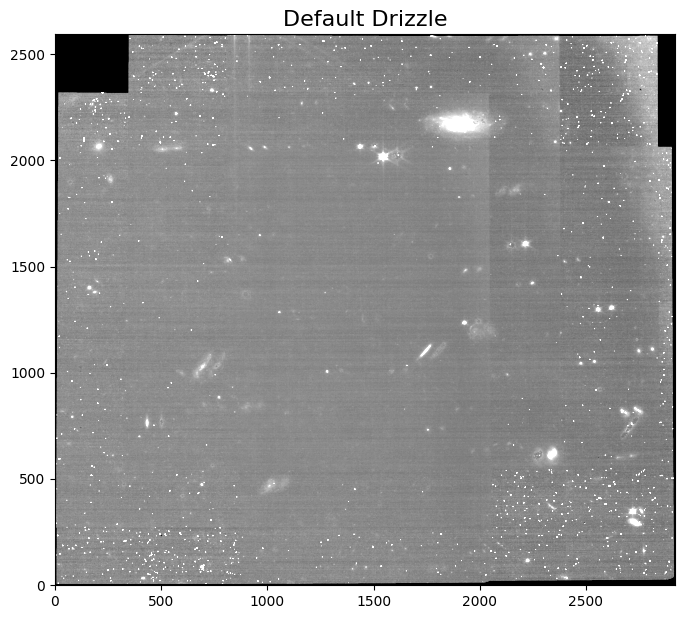

In [7]:
import matplotlib.pyplot as plt
import astropy.io.fits as fits
data = fits.getdata('nircam_f070w_default_i2d.fits', 'SCI')
plt.figure(figsize=(8,8))
plt.imshow(data, origin='lower', cmap='gray', vmin=0.1, vmax=0.5)
plt.title('Default Drizzle', fontsize=16)

In [8]:
import numpy as np
from astropy.visualization import ZScaleInterval
from jwst.datamodels import dqflags

def plot_ramp_data(file, x, y, cutout=5):
    """Plots up-the-ramp values and displays the science and
    data quality arrays for all groups in the jump image as well
    as the rate image.

    Parameters
    ----------
    file : str
        The rate image file name. A corresponding jump file should be
        in the same location.

    x : int
        The x location of the pixel of interest.

    y : int
        The y location of the pixel of interest.

    cutout : int
        The cutout size in pixels around the pixel of interest for
        the image displays. The full dimension will be cutout*2 pixels.
    """

    # Get relevant data
    data = fits.getdata(file, 'SCI')
    dq = fits.getdata(file, 'DQ')
    ramp_data = fits.getdata(file.replace('rate.fits', 'jump.fits'), 'SCI')
    ramp_dq = fits.getdata(file.replace('rate.fits', 'jump.fits'), 'GROUPDQ')
    rate = data[y,x]
    ramp_vals = ramp_data[:,:,y,x]
    groups = np.arange(0, ramp_data.shape[1]).astype(int)
    ngroups = len(groups)
    
    # Plot up-the-ramp signal
    fig, ax = plt.subplots(3, ngroups, figsize=(ngroups*4, ngroups*3), constrained_layout=True)
    ax[0,0].scatter(groups+1, ramp_vals)
    ax[0,0].grid(ls='--')
    ax[0,0].set_xlabel('Group #')
    ax[0,0].set_ylabel('Signal [DN]')
    ax[0,0].set_title('Pixel {}, {}'.format(x,y))
    
    # Plot rate image and dq
    fig.delaxes(ax[0,3])
    z = ZScaleInterval()
    vmin, vmax = z.get_limits(data)
    ax[0,1].imshow(data[y-cutout:y+cutout+1, x-cutout:x+cutout+1], 
                   vmin=vmin, vmax=vmax, origin='lower', cmap='gray')
    ax[0,1].set_title('Rate Image\n{:.3f} DN/s'.format(data[y,x]))
    ax[0,2].imshow(dq[y-cutout:y+cutout+1, x-cutout:x+cutout+1], 
                   vmin=0, vmax=0.1, origin='lower', cmap='gray')
    dq_vals = dqflags.dqflags_to_mnemonics(dq[y,x], dqflags.pixel)
    if len(dq_vals)==0:
        dq_vals = "{'GOOD'}"
    ax[0,2].set_title('Rate DQ\n{}'.format(dq_vals))
    
    # Plot each group image and dq
    for i in groups:
        vmin, vmax = z.get_limits(ramp_data[0,i])
        ax[1,i].imshow(ramp_data[0,i,y-cutout:y+cutout+1, x-cutout:x+cutout+1], 
                       vmin=vmin, vmax=vmax, origin='lower', cmap='gray')
        ax[1,i].set_title('Group {} Image\n{} DN'.format(i+1, int(ramp_data[0,i,y,x])))
        ax[2,i].imshow(ramp_dq[0,i,y-cutout:y+cutout+1, x-cutout:x+cutout+1], 
                       vmin=0, vmax=0.1, origin='lower', cmap='gray')
        dq_vals = dqflags.dqflags_to_mnemonics(ramp_dq[0,i,y,x], dqflags.pixel)
        if len(dq_vals)==0:
            dq_vals = "{'GOOD'}"
        ax[2,i].set_title('Group {} DQ\n{}'.format(i+1, dq_vals))

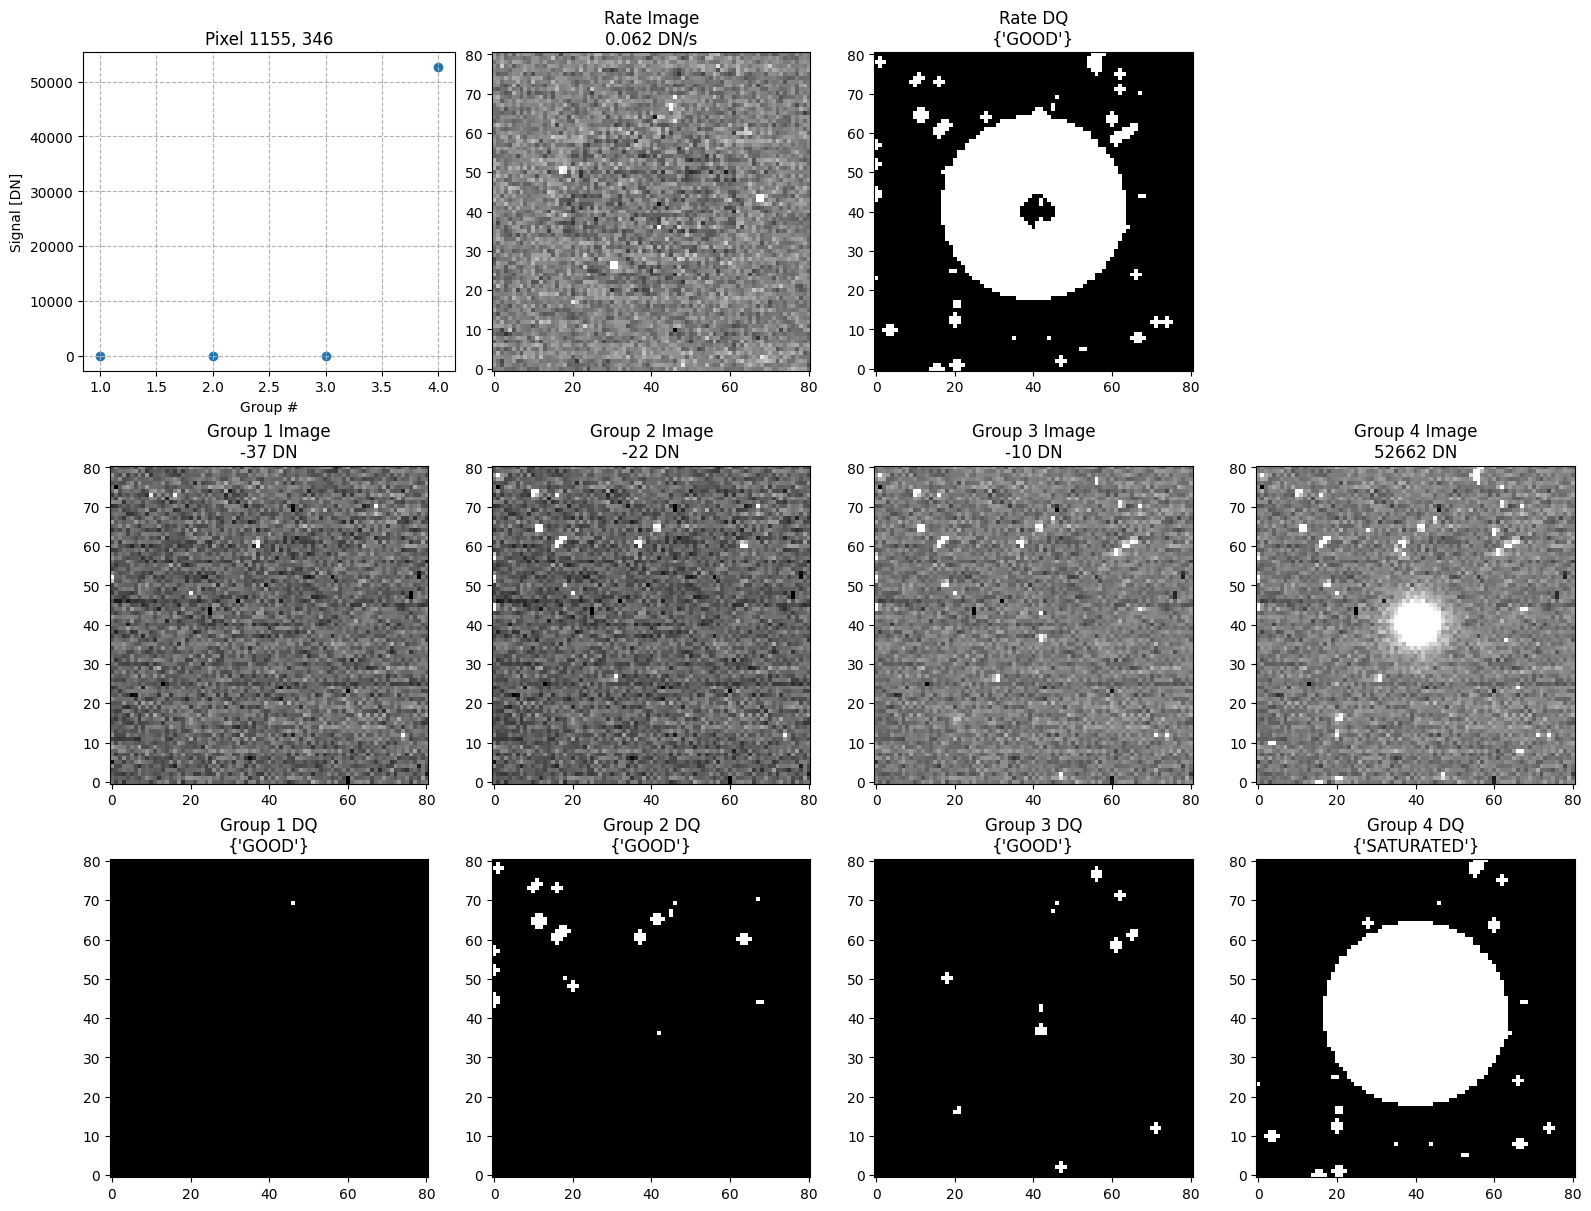

In [9]:
plot_ramp_data('jw04443002001_02101_00012_nrcb3_default_rate.fits', 1155, 346, cutout=40)

In [10]:
uncal_files = sorted(glob.glob('*nrcb3*_uncal.fits'))
for file in uncal_files:
    result = Detector1Pipeline.call(file, save_results=True, steps={'jump': {'save_results': True, 
                                                                             'expand_large_events': True, 
                                                                             'sat_required_snowball': False, 
                                                                             'min_jump_area': 100, 
                                                                             'expand_factor': 2.5}})

2024-07-09 12:28:20,877 - stpipe - INFO - PARS-JUMPSTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-jumpstep_0003.asdf
2024-07-09 12:28:20,923 - stpipe - INFO - PARS-DETECTOR1PIPELINE parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-detector1pipeline_0002.asdf
2024-07-09 12:28:21,024 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2024-07-09 12:28:21,029 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2024-07-09 12:28:21,037 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2024-07-09 12:28:21,041 - stpipe.Detector1Pipeline.emicorr - INFO - EmiCorrStep instance created.
2024-07-09 12:28:21,106 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2024-07-09 12:28:21,110 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2024-07-09 12:28:21,122 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance

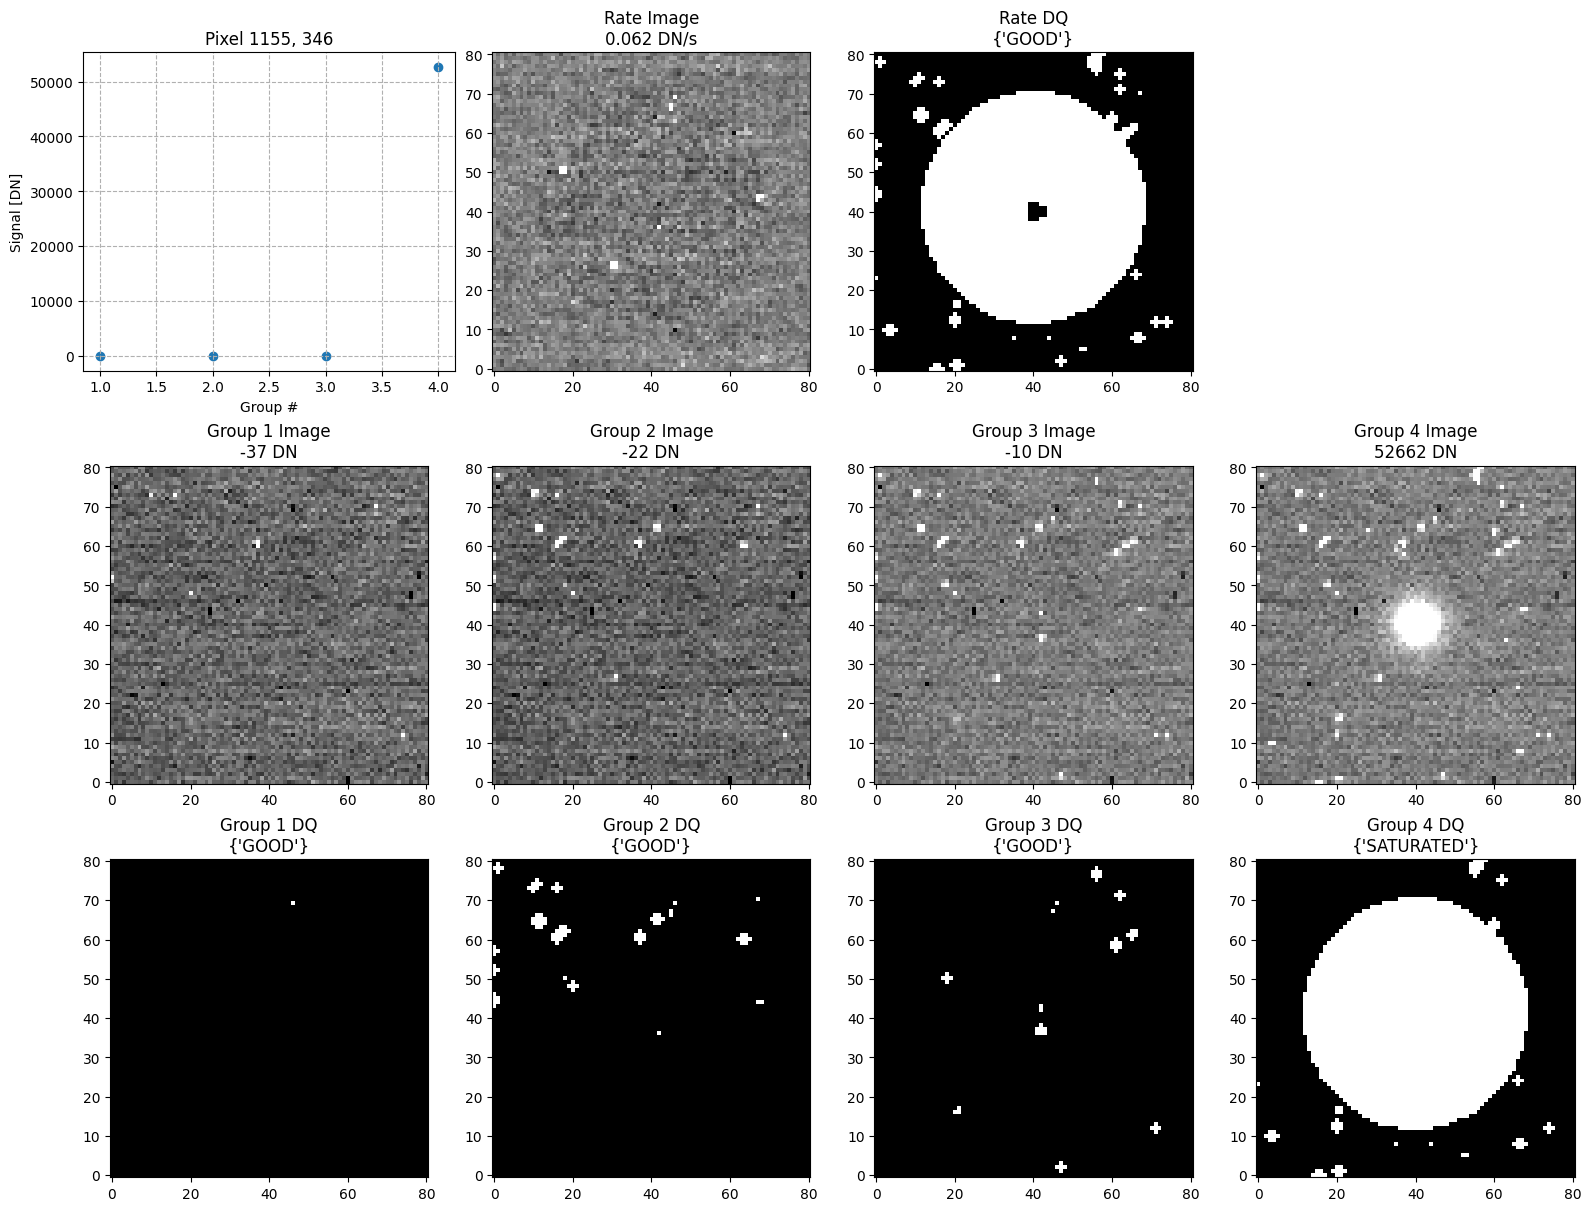

In [11]:
plot_ramp_data('jw04443002001_02101_00012_nrcb3_rate.fits', 1155, 346, cutout=40)

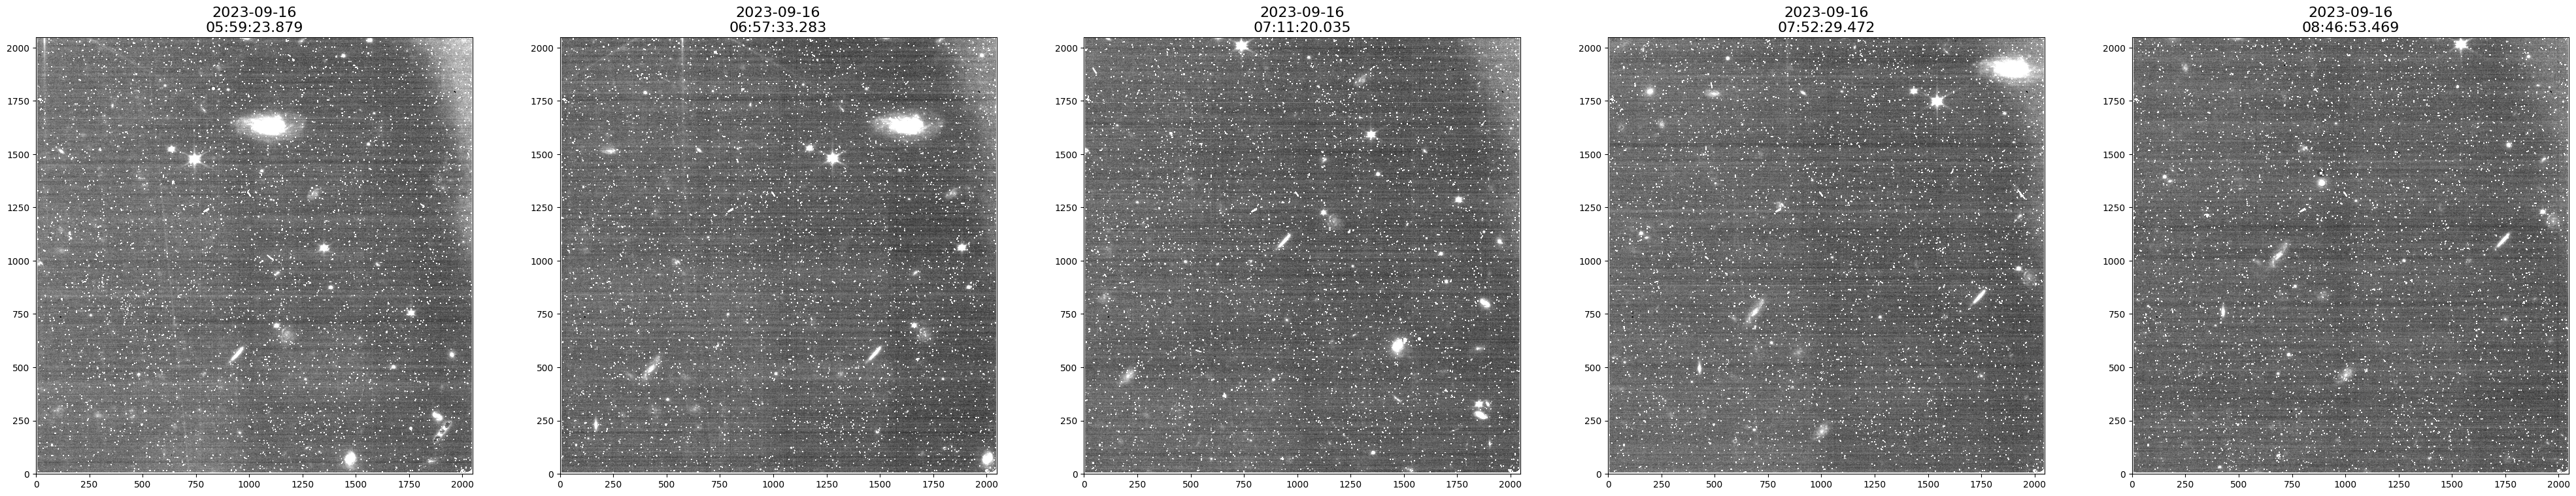

In [12]:
ig, ax = plt.subplots(1, 5, figsize=(50,10))
files = sorted(glob.glob('*nrcb3_default_cal.fits'))
for i,file in enumerate(files):
    data = fits.getdata(file, 'SCI')
    date, time = fits.getheader(file)['DATE-OBS'], fits.getheader(file)['TIME-OBS']
    ax[i].imshow(data, origin='lower', cmap='gray', vmin=0.2, vmax=.5)
    ax[i].set_title('{}\n{}'.format(date, time), fontsize=16)

In [13]:
uncal_files = sorted(glob.glob('*nrcb3*_uncal.fits'))
for file in uncal_files:
    result = Detector1Pipeline.call(file, save_results=True, steps={'persistence': {'flag_pers_cutoff': float(30)}})

2024-07-09 12:43:42,825 - stpipe - INFO - PARS-JUMPSTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-jumpstep_0003.asdf
2024-07-09 12:43:42,888 - stpipe - INFO - PARS-DETECTOR1PIPELINE parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-detector1pipeline_0002.asdf
2024-07-09 12:43:42,983 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2024-07-09 12:43:42,992 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2024-07-09 12:43:42,996 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2024-07-09 12:43:43,001 - stpipe.Detector1Pipeline.emicorr - INFO - EmiCorrStep instance created.
2024-07-09 12:43:43,007 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2024-07-09 12:43:43,019 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2024-07-09 12:43:43,024 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance

In [14]:
rate_files = sorted(glob.glob('*nrcb3_rate.fits'))
for file in rate_files:
    result = Image2Pipeline.call(file, save_results=True)

2024-07-09 12:58:03,331 - stpipe - INFO - PARS-RESAMPLESTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-resamplestep_0001.asdf
2024-07-09 12:58:03,390 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2024-07-09 12:58:03,394 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2024-07-09 12:58:03,403 - stpipe.Image2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2024-07-09 12:58:03,406 - stpipe.Image2Pipeline.flat_field - INFO - FlatFieldStep instance created.
2024-07-09 12:58:03,409 - stpipe.Image2Pipeline.photom - INFO - PhotomStep instance created.
2024-07-09 12:58:03,413 - stpipe.Image2Pipeline.resample - INFO - ResampleStep instance created.
2024-07-09 12:58:04,081 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline running with args ('jw04443002001_02101_00004_nrcb3_rate.fits',).
2024-07-09 12:58:04,150 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline parameters are:
  pre_hooks: []
  post_

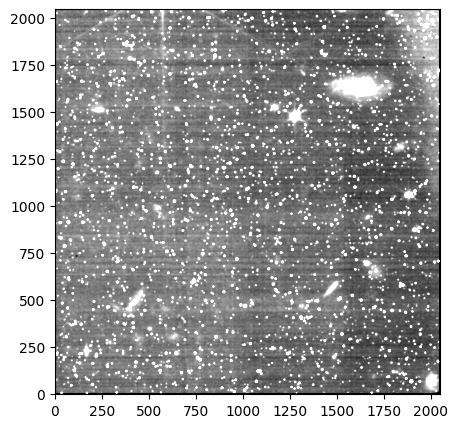

In [15]:
from astropy.convolution import convolve, Gaussian2DKernel

data = fits.getdata('jw04443002001_02101_00008_nrcb3_default_cal.fits')
data_conv = convolve(data, Gaussian2DKernel(x_stddev=3))
plt.figure(figsize=(5,5))
plt.imshow(data_conv, cmap='gray', origin='lower', vmin=.25, vmax=.4)

In [16]:
uncal_files = sorted(glob.glob('*nrcblong*_uncal.fits'))
for file in uncal_files:
    result = Detector1Pipeline.call(file, save_results=True, steps={'jump': {'save_results': True}})

2024-07-09 13:01:57,082 - stpipe - INFO - PARS-JUMPSTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-jumpstep_0003.asdf
2024-07-09 13:01:57,164 - stpipe - INFO - PARS-DETECTOR1PIPELINE parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-detector1pipeline_0002.asdf
2024-07-09 13:01:57,267 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2024-07-09 13:01:57,271 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2024-07-09 13:01:57,279 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2024-07-09 13:01:57,289 - stpipe.Detector1Pipeline.emicorr - INFO - EmiCorrStep instance created.
2024-07-09 13:01:57,307 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2024-07-09 13:01:57,321 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2024-07-09 13:01:57,344 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance

In [17]:
rate_files = sorted(glob.glob('*nrcblong_rate.fits'))
for file in rate_files:
    result = Image2Pipeline.call(file, save_results=True)

2024-07-09 13:32:46,002 - stpipe - INFO - PARS-RESAMPLESTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-resamplestep_0001.asdf
2024-07-09 13:32:46,059 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2024-07-09 13:32:46,063 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2024-07-09 13:32:46,079 - stpipe.Image2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2024-07-09 13:32:46,116 - stpipe.Image2Pipeline.flat_field - INFO - FlatFieldStep instance created.
2024-07-09 13:32:46,123 - stpipe.Image2Pipeline.photom - INFO - PhotomStep instance created.
2024-07-09 13:32:46,129 - stpipe.Image2Pipeline.resample - INFO - ResampleStep instance created.
2024-07-09 13:32:46,653 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline running with args ('jw04443002001_02101_00004_nrcblong_rate.fits',).
2024-07-09 13:32:46,673 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline parameters are:
  pre_hooks: []
  po

In [18]:
cal_files = sorted(glob.glob('*nrcblong_cal.fits'))
asn = asn_from_list.asn_from_list(cal_files, rule=DMS_Level3_Base, product_name='nircam_f070w_long')
with open('nircam_f070w_long.json', 'w') as outfile:
    outfile.write(asn.dump()[1])

result = Image3Pipeline.call('nircam_f070w_long.json', save_results=True, steps={'tweakreg': {'save_catalogs': True}})

2024-07-09 14:56:34,555 - stpipe - INFO - PARS-TWEAKREGSTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-tweakregstep_0042.asdf
2024-07-09 14:56:34,628 - stpipe - INFO - PARS-RESAMPLESTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-resamplestep_0001.asdf
2024-07-09 14:56:34,732 - stpipe - INFO - PARS-SOURCECATALOGSTEP parameters found: $HOME/crds_cache/references/jwst/nircam/jwst_nircam_pars-sourcecatalogstep_0021.asdf
2024-07-09 14:56:34,865 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2024-07-09 14:56:34,868 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2024-07-09 14:56:34,877 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep instance created.
2024-07-09 14:56:34,908 - stpipe.Image3Pipeline.skymatch - INFO - SkyMatchStep instance created.
2024-07-09 14:56:34,935 - stpipe.Image3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.
2024-07-09 14:

Text(0.5, 1.0, 'LW image cutout')

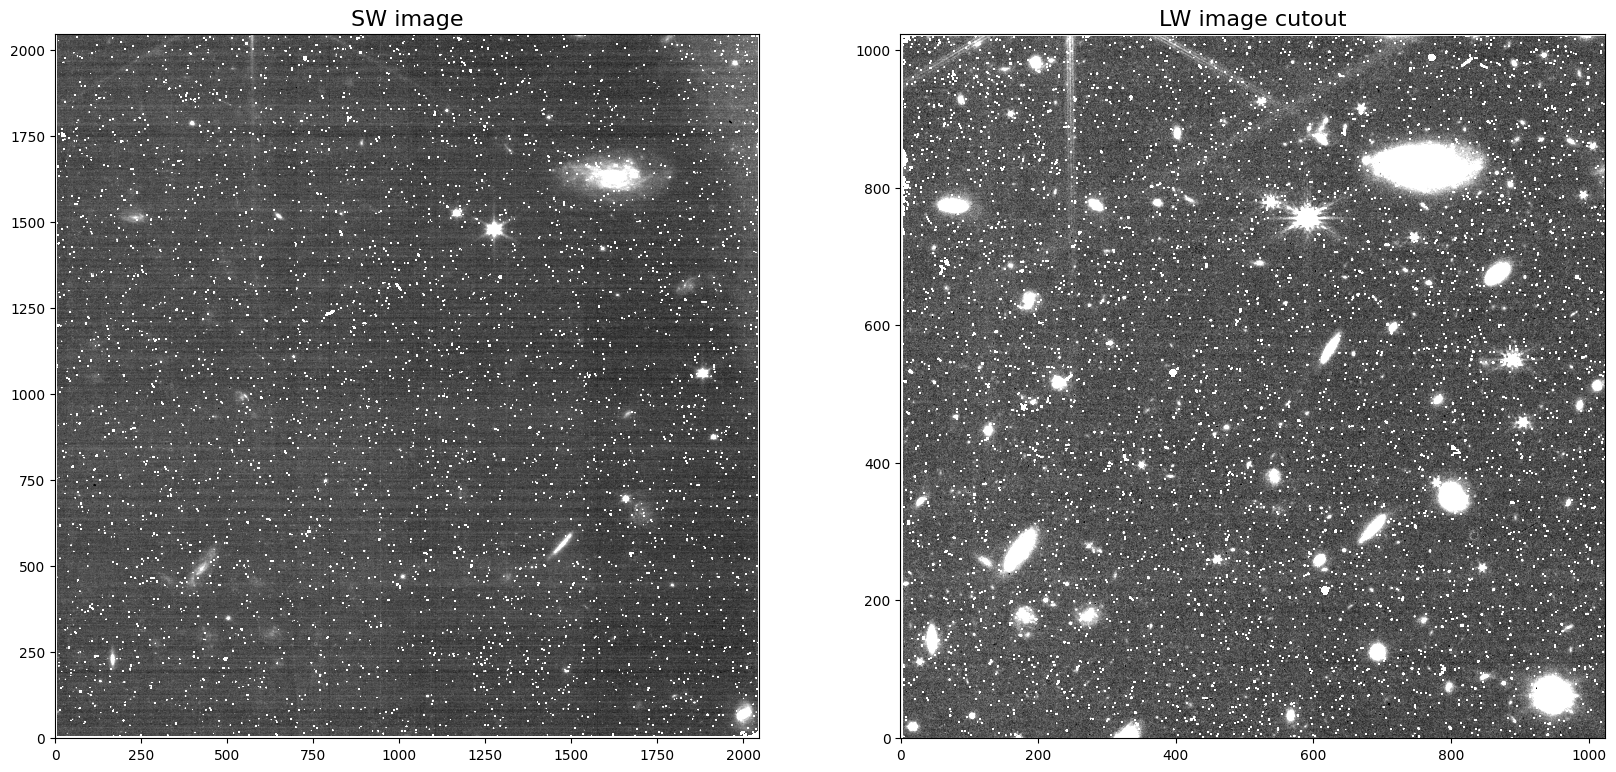

In [19]:
data_sw = fits.getdata('jw04443002001_02101_00008_nrcb3_cal.fits')
data_lw = fits.getdata('jw04443002001_02101_00008_nrcblong_cal.fits')
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(data_sw, origin='lower', cmap='gray', vmin=.2, vmax=.6)
ax[0].set_title('SW image', size=16)
ax[1].imshow(data_lw[1024:,0:1024], origin='lower', cmap='gray', vmin=0.13, vmax=0.21)
ax[1].set_title('LW image cutout', size=16)

In [20]:
from astropy.stats import sigma_clipped_stats, sigma_clip
from photutils.segmentation import detect_sources, detect_threshold

files = sorted(glob.glob('*nrcb3_cal.fits'))
for file in files:
    lw_file = file.replace('nrcb3', 'nrcblong')
    data = fits.getdata(lw_file, 'SCI')
    dq = fits.getdata(lw_file, 'DQ')
    data = np.ma.masked_array(data, mask=dq!=0)
    
    mean, median, stddev = sigma_clipped_stats(data, sigma=3.0)
    data -= median
    threshold = 1.0 * stddev
    data_conv = convolve(data, Gaussian2DKernel(x_stddev=3))
    segmap_orig = detect_sources(data_conv, threshold, npixels=8).data.astype(int)
    segmap_orig[segmap_orig!=0] = 1

    segmap = convolve(segmap_orig, Gaussian2DKernel(x_stddev=3))
    segmap[segmap<0.05] = 0
    segmap[segmap>=0.05] = 1

    fits.writeto(lw_file.replace('.fits', '_seg.fits'), segmap, overwrite=True)

2024-07-09 15:05:03,143 - stpipe - WARNING - /usr/local/anaconda3/envs/jwst_env/lib/python3.11/site-packages/astropy/convolution/convolve.py:425: AstropyUserWarning: nan_treatment='interpolate', however, NaN values detected post convolution. A contiguous region of NaN values, larger than the kernel size, are present in the input array. Increase the kernel size to avoid this.
2024-07-09 15:05:03,145 - stpipe - WARNING -   warnings.warn(
2024-07-09 15:05:03,147 - stpipe - WARNING - 
2024-07-09 15:05:43,784 - stpipe - WARNING - /usr/local/anaconda3/envs/jwst_env/lib/python3.11/site-packages/astropy/convolution/convolve.py:425: AstropyUserWarning: nan_treatment='interpolate', however, NaN values detected post convolution. A contiguous region of NaN values, larger than the kernel size, are present in the input array. Increase the kernel size to avoid this.
2024-07-09 15:05:43,785 - stpipe - WARNING -   warnings.warn(
2024-07-09 15:05:43,786 - stpipe - WARNING - 
2024-07-09 15:06:03,586 - st

Text(0.5, 1.0, 'LW image segmap')

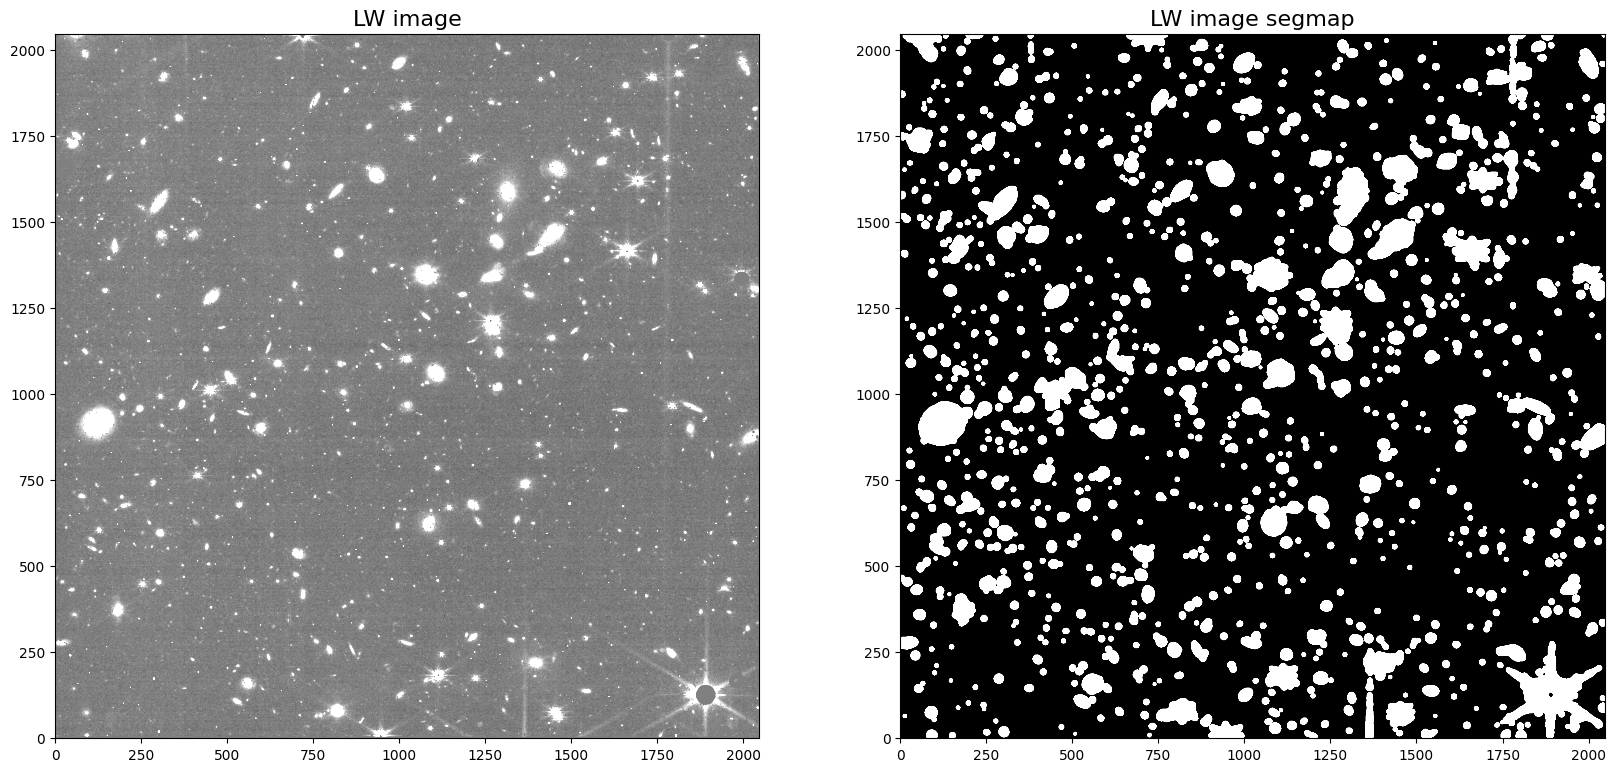

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
data[data.mask==True] = 0
ax[0].imshow(data, origin='lower', cmap='gray', vmin=-.05, vmax=.05)
ax[0].set_title('LW image', size=16)
ax[1].imshow(segmap, origin='lower', cmap='gray', vmin=0, vmax=0.1)
ax[1].set_title('LW image segmap', size=16)

In [1]:
from jwst.datamodels import ImageModel
from jwst.outlier_detection.outlier_detection import gwcs_blot

files = sorted(glob.glob('*nrcb3_cal.fits'))
for file in files:
    # Create an image model of the lw segmap
    lw_file = file.replace('nrcb3', 'nrcblong')
    lw_model = ImageModel(lw_file)
    lw_segmap = fits.getdata(lw_file.replace('.fits', '_seg.fits'))
    lw_model.data = lw_segmap
    # Blot the segmap data from the lw image onto the corresponding sw image
    model = ImageModel(file)
    blotted_data = gwcs_blot(lw_model, model, interp='nearest')
    fits.writeto(file.replace('.fits', '_seg.fits'), blotted_data, overwrite=True)

ig, ax = plt.subplots(1, 3, figsize=(30,10))
ax[0].imshow(model.data, origin='lower', cmap='gray', vmin=0.2, vmax=.6)
ax[0].set_title('SW image', size=30)
ax[1].imshow(blotted_data, origin='lower', cmap='gray', vmin=0, vmax=.1)
ax[1].set_title('SW segmap', size=30)
ax[2].imshow(lw_segmap, origin='lower', cmap='gray', vmin=0, vmax=.1)
ax[2].set_title('LW segmap', size=30)
ax[2].add_patch(Rectangle((0, 1024), 1024, 1024, linewidth=5, edgecolor='red', facecolor='none'))

NameError: name 'glob' is not defined